In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [7]:
df=pd.read_csv('advertising.csv')
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


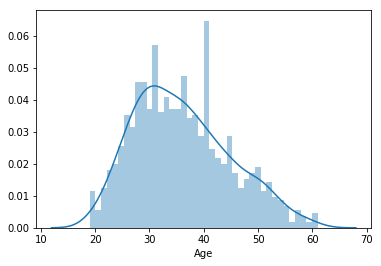

In [13]:
sns.distplot(df['Age'],bins=40)

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


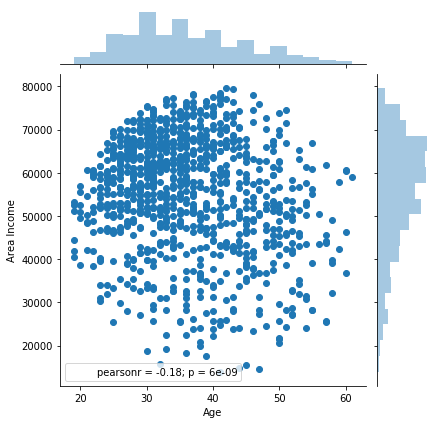

In [16]:
sns.jointplot(x='Age',y='Area Income',data=df)

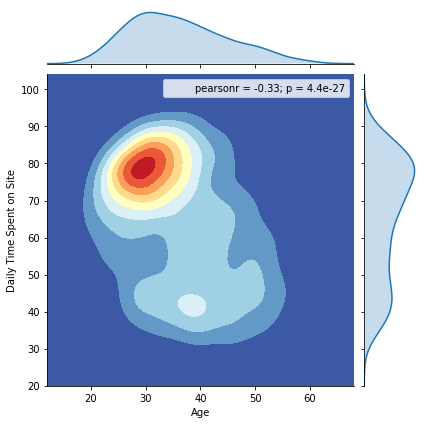

In [22]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde',cmap='RdYlBu_r')

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


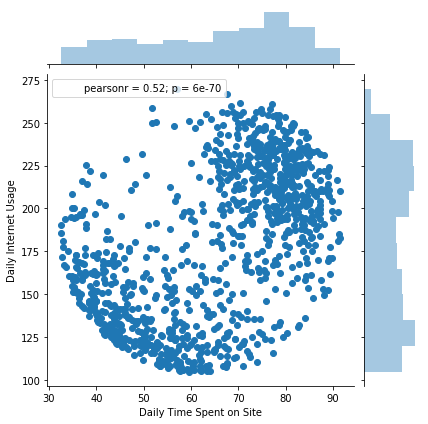

In [23]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,cmap='RdYlBu_r')

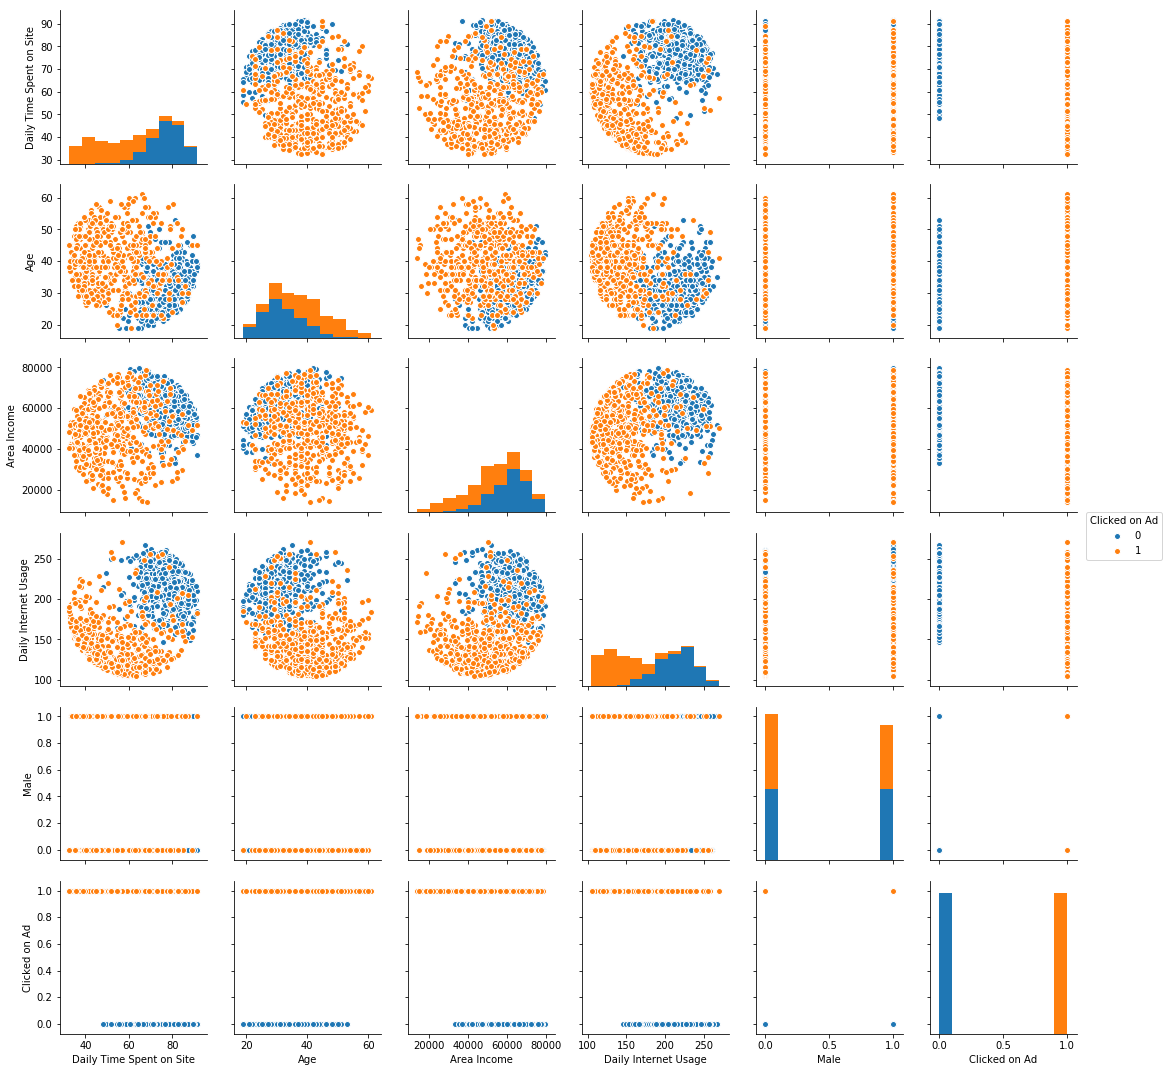

In [25]:
sns.pairplot(data=df,hue='Clicked on Ad')

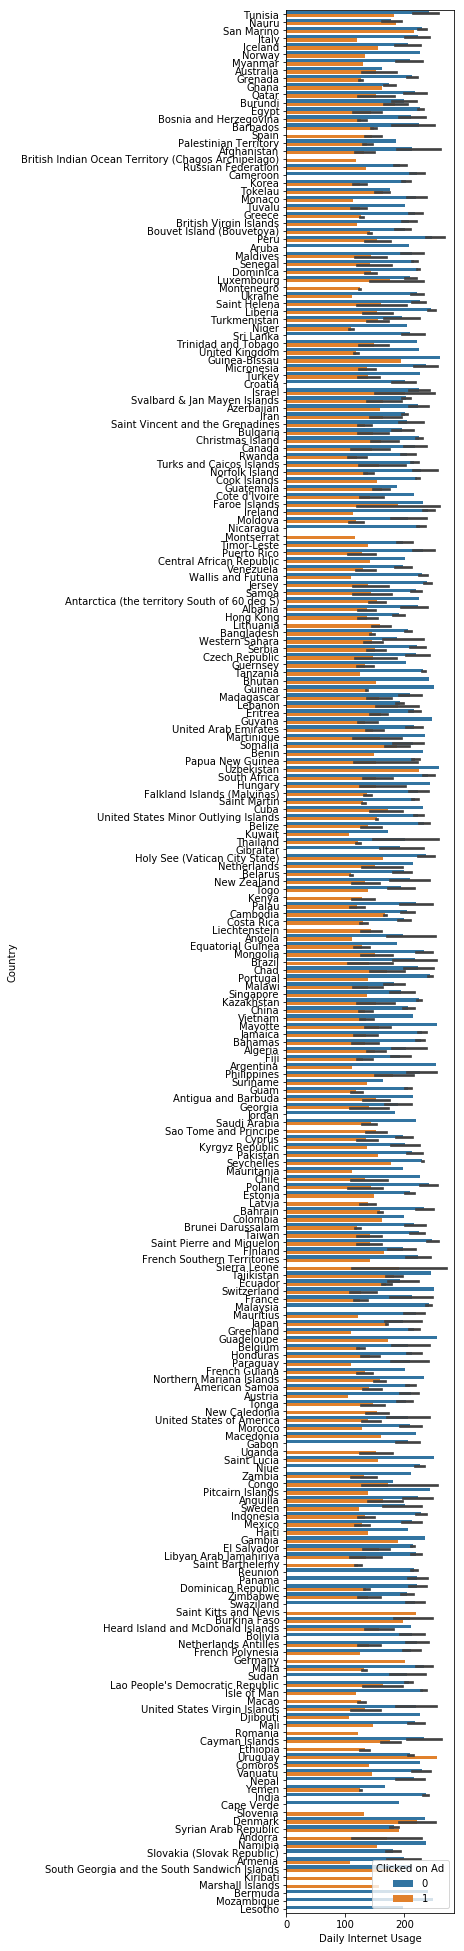

In [34]:
plt.figure(figsize=(3,35))
sns.barplot(y='Country',x='Daily Internet Usage', data=df,hue='Clicked on Ad')

In [45]:
df[np.max(df['Daily Internet Usage'])==df['Daily Internet Usage']]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
247,57.05,41,50278.89,269.96,Seamless full-range website,Port Erinberg,1,Sierra Leone,2016-01-09 03:45:19,1


In [49]:
len(df['Ad Topic Line'].unique())  #every line unique sentence not use for predition if not plan to do nlp

1000

In [50]:
len(df['Country'].unique())

237

In [53]:
df['Country'].value_counts()   #repeated visitors per country

France                                                 9
Czech Republic                                         9
Australia                                              8
Afghanistan                                            8
Cyprus                                                 8
Senegal                                                8
Liberia                                                8
Greece                                                 8
Turkey                                                 8
South Africa                                           8
Peru                                                   8
Micronesia                                             8
Albania                                                7
Bahamas                                                7
Burundi                                                7
Eritrea                                                7
Cambodia                                               7
Bosnia and Herzegovina         

In [85]:
#2016-01-09 03:45:19
df['hour']=df['Timestamp'].apply(lambda x:int(x.strip().split(' ')[1].split(':')[0]))
df['hour'].unique()

array([ 0,  1, 20,  2,  3, 14,  9,  8, 21, 19,  7,  4, 13, 17, 15, 10,  5,
       12, 22,  6, 11, 18, 23, 16], dtype=int64)

In [109]:
df['hour_norm']=df['hour'].apply(lambda x:int(np.round((x/2)/12)))

In [116]:
np.max(df['Daily Internet Usage'])

269.96

In [118]:
df['Daily_Internet_Usage_norm']=df['Daily Internet Usage']/np.max(df['Daily Internet Usage'])
df['Area_Income_norm']=df['Area Income']/np.max(df['Area Income'])
df['Daily_Time_Spent_on_Site_norm']=df['Daily Time Spent on Site']/np.max(df['Daily Time Spent on Site'])
df['Age_norm']=df['Age']/np.max(df['Age'])

In [127]:
df.head(7)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour,hour_norm,Daily_Internet_Usage_norm,Area_Income_norm,Daily_Time_Spent_on_Site_norm,Age_norm
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,0.948622,0.777934,0.754129,0.573770
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,0.717773,0.861068,0.877502,0.508197
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,1,0.876056,0.752168,0.759816,0.426230
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,0,0.910839,0.689518,0.811003,0.475410
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,0,0.835605,0.929612,0.747785,0.573770
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,14,1,0.839902,0.751861,0.656130,0.377049
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,20,1,0.771818,0.677524,0.972438,0.540984


In [128]:
df['hour'].value_counts()

7     54
20    50
9     49
21    48
0     45
5     44
23    44
8     43
14    43
22    43
13    42
3     42
4     42
18    41
17    41
11    40
6     39
19    39
16    39
12    38
2     36
15    35
1     32
10    31
Name: hour, dtype: int64

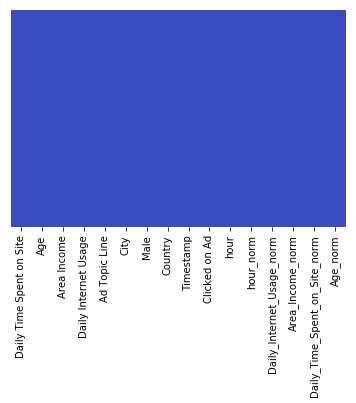

In [122]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [124]:
country_index=pd.get_dummies(df['Country'],drop_first=False)
country_index.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
dg=pd.concat([df,country_index],axis=1)
dg.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
dg['Daily_Time_Spent_on_Site_norm'].head()

0    0.754129
1    0.877502
2    0.759816
3    0.811003
4    0.747785
Name: Daily_Time_Spent_on_Site_norm, dtype: float64

In [141]:
dg.drop(['Daily Time Spent on Site','Daily Internet Usage','Age','Area Income','Ad Topic Line','City','Country','Timestamp','hour'],axis=1,inplace=True)

In [142]:
dg.head()

,Male,Clicked on Ad,hour_norm,Daily_Internet_Usage_norm,Area_Income_norm,Daily_Time_Spent_on_Site_norm,Age_norm,Afghanistan,Albania,Algeria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0.948622,0.777934,0.754129,0.573770,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.717773,0.861068,0.877502,0.508197,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.876056,0.752168,0.759816,0.426230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.910839,0.689518,0.811003,0.475410,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.835605,0.929612,0.747785,0.573770,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
dg.columns

Index(['Male', 'Clicked on Ad', 'hour_norm', 'Daily_Internet_Usage_norm',
       'Area_Income_norm', 'Daily_Time_Spent_on_Site_norm', 'Age_norm',
       'Afghanistan', 'Albania', 'Algeria',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

In [146]:
Y=dg['Clicked on Ad']

In [147]:
X=dg.loc[:, dg.columns != 'Clicked on Ad']

In [148]:
X.head()

,Male,hour_norm,Daily_Internet_Usage_norm,Area_Income_norm,Daily_Time_Spent_on_Site_norm,Age_norm,Afghanistan,Albania,Algeria,American Samoa,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0.948622,0.777934,0.754129,0.573770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.717773,0.861068,0.877502,0.508197,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0.876056,0.752168,0.759816,0.426230,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0.910839,0.689518,0.811003,0.475410,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.835605,0.929612,0.747785,0.573770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Split the data into training set and testing set using train_test_split**

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [150]:
logmodel=LogisticRegression()

In [151]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
train_predict=logmodel.predict(X_train)

** Train and fit a logistic regression model on the training set.**

In [153]:
print(classification_report(Y_train,train_predict))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       343
          1       0.99      0.94      0.97       357

avg / total       0.97      0.97      0.97       700



In [154]:
print(confusion_matrix(Y_train,train_predict))

[[341   2]
 [ 20 337]]


In [155]:
test_predict=logmodel.predict(X_test)

In [156]:
print(classification_report(Y_test,test_predict))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       157
          1       0.99      0.94      0.97       143

avg / total       0.97      0.97      0.97       300



In [157]:
print(confusion_matrix(Y_test,test_predict))

[[156   1]
 [  8 135]]
